# 9. 支持向量机（Support Vector Machines）

**支持向量机（support vector machines，SVM）** 是一类按监督学习方式对数据进行二元分类的广义线性分类器，其决策边界是对学习样本求解的最大间隔超平面（maximum-margin hyperplane）。

## 9.1 最大间隔分类器（Maximal Margin Classifier）

### 9.1.1 超平面（hyperplane）

在p维空间中，超平面是p-1维的子空间。例如，在二维空间中，超平面是一条直线。在三维空间中，超平面是一个平面。二维空间的超平面可以定义为:

$$\beta_0+\beta_1 X_1+\beta_2 X_2 = 0$$  

即任何使得该式成立的$X = (X_1,X_2)^T$都是超平面上的一个点。

对一个二维特征空间，绘制出定义为$1+2X_1 +3X_2 = 0 $的超平面：

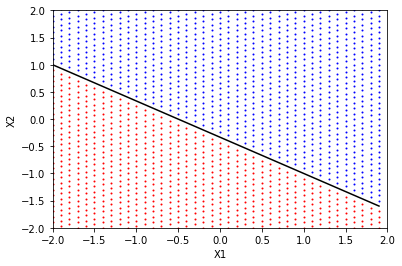

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x=np.arange(-2,2,0.1)

y1=-1/3*(1+2*x)

for i in np.arange(0.1,10,0.1):
    y2=-1/3*(1+2*x)+i
    y3=-1/3*(1+2*x)-i
    plt.scatter(x,y2,c='b',s = 1)
    plt.scatter(x,y3,c='r',s = 1)
    
plt.plot(x,y1,c='black')

axes = plt.gca()
axes.set_xlim([-2,2])
axes.set_ylim([-2,2])
plt.grid(False)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

超平面将二维特征空间分为两个区域，红色区域是满足$1+2X_1 +3X_2 < 0 $的点集，蓝色区域是满足$1+2X_1 +3X_2 > 0 $的点集。

### 9.1.2 分割超平面（seperating hyperplane）

假设可以在特征空间$R^n$中构建一个超平面S，将特征空间划分为两个部分。位于两部分的点（特征向量）分别被分为正、负两类,则这个超平面即为分割超平面。
在上图的例子中，标记为蓝色的样本属于$y_{i}=1$的类别，标记为红色的样本属于$y_{i}=-1$的类别，推而广之，分隔超平面具有如下性质：

$$\beta_{0}+\beta_{1} x_{i 1}+\beta_{2} x_{i 2}+\ldots+\beta_{p} x_{i p}>0 \text { if } y_{i}=1$$

$$\beta_{0}+\beta_{1} x_{i 1}+\beta_{2} x_{i 2}+\ldots+\beta_{p} x_{i p}<0 \text { if } y_{i}=-1$$

等价于对所有的i = 1, . . . , n，

$$y_i(\beta_{0}+\beta_{1} x_{i 1}+\beta_{2} x_{i 2}+\ldots+\beta_{p} x_{i p})>0 $$ 

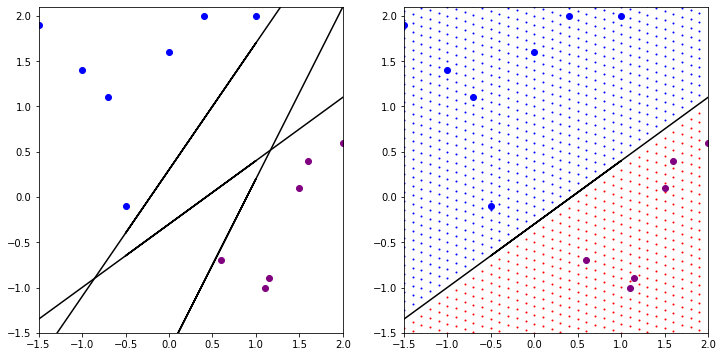

In [2]:
import numpy as np
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2) 

df=pd.read_excel('1.xlsx')
ax1.scatter(df['X1'].head(11),df['X2'].head(11),c='blue')
ax1.scatter(df['X1'].tail(11),df['X2'].tail(11),c='purple')

y=df['X1']*0.7-0.3
y1=df['X1']*1.9-1.7
y2=df['X1']*1.4+0.3

ax1.plot(df.X1,y,c='black')
ax1.plot(df.X1,y1,c='black')
ax1.plot(df.X1,y2,c='black')

ax1.set_xlim(-1.5, 2)
ax1.set_ylim(-1.5, 2.1)

x=np.arange(-2,2,0.1)
for i in np.arange(0.1,10,0.1):
    y3=x*0.7-0.3+i
    y4=x*0.7-0.3-i
    plt.scatter(x,y3,c='b',s = 1)
    plt.scatter(x,y4,c='r',s = 1)
    
ax2.scatter(df['X1'].head(11),df['X2'].head(11),c='blue')
ax2.scatter(df['X1'].tail(11),df['X2'].tail(11),c='purple')
ax2.plot(df.X1,y,c='black')

ax2.set_xlim(-1.5, 2)
ax2.set_ylim(-1.5, 2.1)

plt.show()
import warnings
warnings.filterwarnings("ignore")

### 9.3.3 最大间隔分类器（maximal margin classifier）

如上图，通常来说，如果数据可以被超平面分割开，那么事实上存在无数个这样的超平面，要确定唯一的最优分割超平面，SVM采用的学习策略是间隔最大化，即找到最大间隔超平面（maximal margin hyperplane）.首先，计算训练集中每个样本点到特定分割超平面的垂直距离，这些距离的最小值就是训练数据集与分隔超平面的距离，这个距离被称作间隔（margin）。换言之，间隔就是训练数据集中离分割超平面最近的点与分隔超平面的距离。最大间隔超平面就是间隔最大的分隔超平面。接下来，通过判断测试样本落在最大间隔超平面的哪一侧来判断测试样本的类别归属。也就是说，对于测试样本i，通过$f(x_i)=\beta_{0}+\beta_{1} x_{i 1}+\beta_{2} x_{i 2}+\ldots+\beta_{p} x_{i p}$的符号来对其进行分类。这就是最大间隔分类器。

下图给出了训练数据集的最大间隔超平面。直观上来看，最大间隔超平面是两类训练样本“正中间”的分割超平面，是能够插入两个类别之间的最宽的“平板”中线。由于训练集的局限性或噪声的因素，训练集外的样本可能比训练样本更接近分割界，这将使部分分类产生错误，而处于“正中间”的最大间隔超平面将测试样本错误分类的可能性最小。
![](fig/1.png)

在上图中，有三个训练样本点（特征向量）到最大间隔超平面的距离是一样的且都是最近的，它们落在虚线上，虚线表明了间隔的宽度。这三个特征向量就叫做支持向量（support vector）

### 9.1.4 构建最大间隔分类器

现有n个训练样本点$x_1$, $x_2$, …, $x_n$$\in$$R_p$和类别标签$y_1$, $y_2$, …, $y_n$$\in$\{-1,1\}，定义超平面$\beta_{0}+\beta_{1} x+\beta_{2} x+\ldots+\beta_{p} x = 0$.

则训练样本点到超平面的距离为
$\mid\beta_{0}+\beta_{1} x_{i 1}+\beta_{2} x_{i 2}+\ldots+\beta_{p} x_{i p}\mid/\sqrt{\sum_{j=1}^{p} \beta_{j}^{2}}$

当样本都落在了超平面正确的一侧。且$\sum_{j=1}^{p} \beta_{j}^{2}=1$成立，训练样本点到超平面的距离就是$y_{i}\left(\beta_{0}+\beta_{1} x_{i 1}+\beta_{2} x_{i 2}+\ldots+\beta_{p} x_{i p}\right)$

最大间隔超平面就是如下最优化问题的解
$$
\begin{array}{l}
\underset{\beta_{0}, \beta_{1}, \ldots, \beta_{p}}{\operatorname{maximize}} M \\
\text { subject to } \sum_{j=1}^{p} \beta_{j}^{2}=1, \\
y_{i}\left(\beta_{0}+\beta_{1} x_{i 1}+\beta_{2} x_{i 2}+\ldots+\beta_{p} x_{i p}\right) \geq M \quad {\forall i=1,\ldots,n} 
\end{array} 
$$

M 代表的就是超平面的间隔，即训练数据集中离分割超平面最近的点与分隔超平面的距离。优化问题就是要找出最大化M的$\beta_0$，$\beta_1$，… $\beta_p$，也就是求解最大间隔超平面。

Training score is  1.0
Test score is  1.0


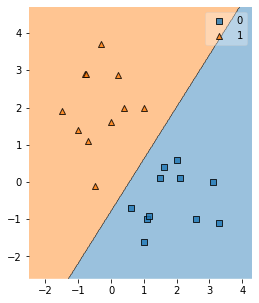

In [14]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from mlxtend.plotting import plot_decision_regions


import matplotlib.pyplot as plt
import seaborn as sns

import warnings

data=pd.read_excel('1.xlsx')
data['y'] = 1*(data['label']>0)
data.drop(['label'], axis = 1,inplace=True)

X_train,X_test,y_train,y_test = train_test_split(data.drop('y',axis=1),data['y'],test_size = 0.3,random_state = 1)

svc = SVC(kernel = 'linear')
svc.fit(X_train,y_train)
print('Training score is ',svc.score(X_train,y_train)) # Returns the mean accuracy on the given test data and labels
print('Test score is ',svc.score(X_test,y_test))

plt.figure(figsize = (4,5))
plot_decision_regions(np.array(data.drop('y',axis=1)), np.array(data['y']), clf=svc, legend=1)

## 9.2 支持向量分类器（Support Vector Classifier）

事实上，即使分割超平面确实存在，基于分割超平面的分类器仍有不可取的时候，因为基于分割超平面的分类器需要将所有的训练样本都正确分类；这样的分类器对单个样本是很敏感的。下图中，只增加一个观测就使得最大间隔超平面发生了巨大的变化，而且最后得到的最大间隔超平面不尽如人意，因为其间隔很小。此外，最大间隔超平面对单个样本的变化极其敏感，这也说明它可能过拟合了训练数据。

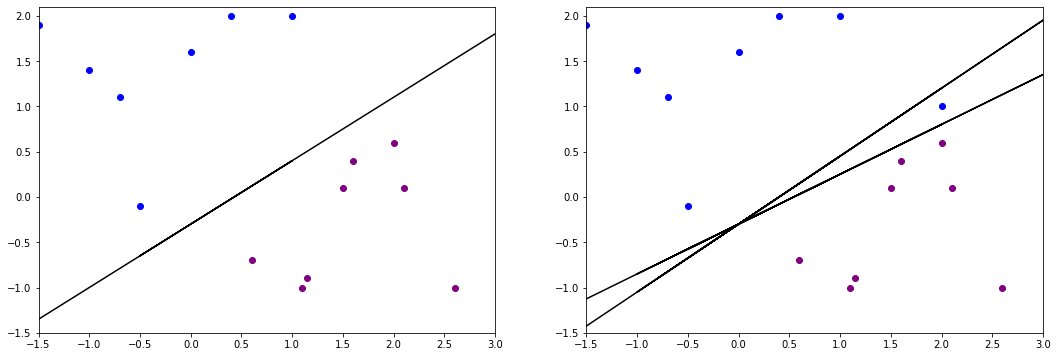

In [17]:
import numpy as np
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2) 

df=pd.read_excel('1.xlsx')

ax1.scatter(df['X1'].head(11),df['X2'].head(11),c='blue')
ax1.scatter(df['X1'].tail(11),df['X2'].tail(11),c='purple')

y=df['X1']*0.7-0.3

ax1.plot(df.X1,y,c='black')

ax1.set_xlim(-1.5, 3)
ax1.set_ylim(-1.5, 2.1)

df1=df.copy()
df1.loc[22]=[2,1,1]
df1=df1.sort_values('label',ascending=False)
df1=df1.reset_index()

ax2.scatter(df1['X1'].head(12),df1['X2'].head(12),c='blue')
ax2.scatter(df1['X1'].tail(11),df1['X2'].tail(11),c='purple')

y=df1['X1']*0.75-0.3

ax2.plot(df1.X1,y,c='black')

y1=df1['X1']*0.55-0.3

ax2.plot(df1.X1,y1,c='black')

ax2.set_xlim(-1.5, 3)
ax2.set_ylim(-1.5, 2.1)

plt.show()

在这种情况下，为了提高分类器对单个样本分类的稳定性以及为了使大部分训练样本观测更好地被分类，暂且考虑不能完美分类的超平面分类器，也就是说，允许小部分训练样本误分以保证分类器对其余大部分样本实现更好地分类。

**支持向量分类器（support vector classifier）**，也称为**软间隔分类器（soft margin classifier）**，允许一些样本点落在间隔错误的一侧（即分割超平面与间隔边际之间），甚至超平面错误的一侧。
![](fig/4.png)

Training score is  0.9545454545454546
Test score is  1.0


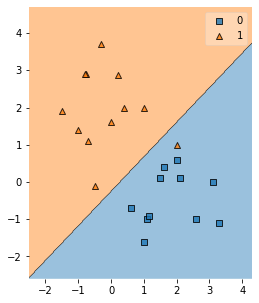

In [21]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from mlxtend.plotting import plot_decision_regions


import matplotlib.pyplot as plt
import seaborn as sns

import warnings

data=df1.copy()
data['y'] = 1*(data['label']>0)
data.drop(['label','index'], axis = 1,inplace=True)

X_train,X_test,y_train,y_test = train_test_split(data.drop('y',axis=1),data['y'],test_size = 1,random_state = 1)

svc = SVC(kernel = 'linear',C=1)
svc.fit(X_train,y_train)
print('Training score is ',svc.score(X_train,y_train))
print('Test score is ',svc.score(X_test,y_test))

plt.figure(figsize = (4,5))
plot_decision_regions(np.array(data.drop('y',axis=1)), np.array(data['y']), clf=svc, legend=1)

### 支持向量分类器的细节

支持向量分类器所选的超平面能够将大部分的训练样本正确分类，但可能会误分小部分训练样本。所选的超平面是如下最优化问题的解。
$$
\begin{array}{l}
\underset{\beta_{0}, \beta_{1}, \ldots, \beta_{p}, \epsilon_{1}, \ldots, \epsilon_{n}}{\operatorname{maximize}} M \\
\text { subject to } \sum_{j=1}^{p} \beta_{j}^{2}=1, \\
y_{i}\left(\beta_{0}+\beta_{1} x_{i 1}+\beta_{2} x_{i 2}+\ldots+\beta_{p} x_{i p}\right) \geq M\left(1-\epsilon_{i}\right), \\
\quad \epsilon_{i} \geq 0, \quad \sum_{i=1}^{n} \epsilon_{i} \leq C
\end{array}
$$

$\epsilon_{i}$是松弛变量，松弛变量的作用是允许训练样本中有小部分样本可以落在间隔错误的一侧或是超平面的错误的一侧。松弛变量$\epsilon_{i}$指出了第i个样本点的位置、相对于间隔的位置以及相对于超平面的位置。
* 如果$\epsilon_{i}=0$，那么第i个样本点就落在间隔的正确的一侧。
* 如果$\epsilon_{i}>0$，那么第i个样本点落在间隔的错误的一侧（间隔边界与超平面之间）。
* 如果$\epsilon_{i}>1$，那么第i个样本点落在超平面错误的一侧。

$C$ 是非负的调节参数. $C$ 是所有$\epsilon_{i}$之和的上界，它代表了我们能够容忍的穿过间隔（以及超平面）的样本的数目和严重程度。可以把C看做是在n个样本中对穿过间隔的样本数量的“约束”。
* 如果$C=0$，那么就不允许存在穿过间隔的样本，同时$\epsilon_{1}=\epsilon_{2}=\dots=\epsilon_{n}=0$必然成立。最优化问题等价于最大间隔超平面的最优化问题。
* 如果$C>0$，那么只有不超过C个样本点可以落在超平面的错误一侧。
随着C的增加，我们越来越能够容许样本点穿过间隔，因此间隔会变得越来越宽。

![](fig/5.png)

落在间隔上的样本和穿过间隔的样本会影响超平面，根据这些样本就能得到分类器，它们被称为**支持向量（support vector）**。而落在间隔的正确一侧的样本对支持向量分类器不会产生任何影响。

如图一，在调节参数C较大的时候，间隔比较宽，穿过间隔的样本点也比较多，从而支持向量的数目也多。在这种情况下，超平面的确定涉及许多样本。因此这个分类器具有较低的方差，但是可能具有较大的偏差。相反，如果C较小，那么支持向量的个数会比较少，分类器的偏差较小而方差较大。

## 9.3 支持向量机

### 9.3.1 使用非线性决策边界分类

在实际中，可能遇到非线性的分类边界。这时支持向量分类器或者任何其他的线性分类器应用到这种数据上，分类效果都不佳。

In [23]:
import pandas as pd
import numpy as np

X1=np.arange(-5,5,0.2)
e=np.random.normal(0,1,50)
X2=X1+e
df=pd.DataFrame({'X1':X1,'X2':X2})
df['y']=0
df.loc[df['X1']>-2,'y']=1
df.loc[df['X1']>2,'y']=0

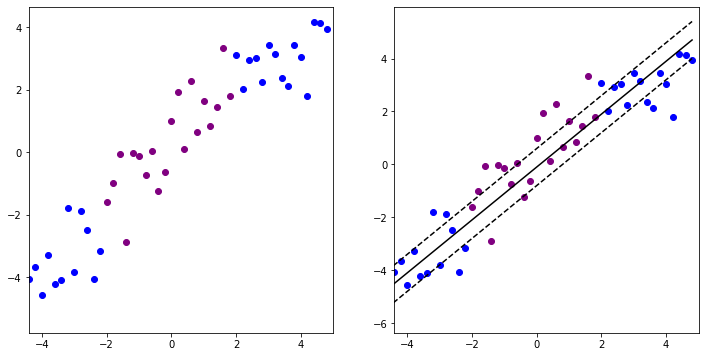

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2) 

df1=df[df['y']==0]
df2=df[df['y']==1]

ax1.scatter(df1['X1'],df1['X2'],c='blue')
ax1.scatter(df2['X1'],df2['X2'],c='purple')

ax1.set_xlim(-4.4, 5)
ax1.set_xlim(-4.4, 5)

ax2.scatter(df1['X1'],df1['X2'],c='blue')
ax2.scatter(df2['X1'],df2['X2'],c='purple')


y=df['X1']-0.1
ax2.plot(df.X1,y,c='black')

y1=df['X1']-0.8
ax2.plot(df.X1,y1,c='black',linestyle="--")

y2=df['X1']+0.6
ax2.plot(df.X1,y2,c='black',linestyle="--")

ax2.set_xlim(-4.4, 5)
ax2.set_xlim(-4.4, 5)

import warnings
warnings.filterwarnings("ignore")

plt.show()

Training score is  0.68
Test score is  0.32


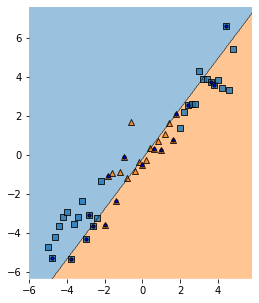

In [37]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from mlxtend.plotting import plot_decision_regions


import matplotlib.pyplot as plt
import seaborn as sns

import warnings

data=df.copy()

X_train,X_test,y_train,y_test = train_test_split(data.drop('y',axis=1),data['y'],test_size = 0.5,random_state = 1)

svc = SVC(kernel = 'linear',C=10)
clf = svc.fit(X_train,y_train)
print('Training score is ',svc.score(X_train,y_train))
print('Test score is ',svc.score(X_test,y_test))
       
plt.figure(figsize = (4,5))
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=10,
        facecolors='b', zorder=10, edgecolors='k') 
plot_decision_regions(np.array(data.drop('y',axis=1)), np.array(data['y']), clf=svc,legend=0)

当原始空间不存在一个能正确划分两类样本的超平面时，可将样本从原始空间映射到一个更高维的特征空间，使得样本在这个特征空间内线性可分。
![](fig/7.png)
可以使用预测变量的函数来扩大特征空间，例如使用二次多项式和三次多项式。例如，可以使用2p个特征$x_{1},x_{1}^{2},x_{2},x_{1}^{2},\ldots ,x_{p},x_{p}^{2}.$来得到支持向量分类器，而不是使用p个特征$x_{1},x_{2},\ldots ,x_{p}.$。这样最优化问题就会变成
$$
\begin{array}{l}
\underset{\beta_{0}, \beta_{11}, \beta_{12} \ldots, \beta_{p 1}, \epsilon_{1}, \ldots, \epsilon_{n}}{\operatorname{maximize}} M \\
\text { subject to } y_{i}\left(\beta_{0}+\sum_{j=1}^{p} \beta_{j 1} x_{i j}+\sum_{j=1}^{p} \beta_{j 2} x_{i j}^{2}\right) \geq M\left(1-\epsilon_{i}\right), \\
\sum_{i=1}^{n} \epsilon_{i} \leq C, \quad \epsilon_{i} \geq 0, \sum_{j=1}^{p} \sum_{k=1}^{2} \beta_{j k}^{2}=1
\end{array}
$$

在扩大的特征空间中，根据上式计算的决策边界是线性的。但是在原始的特征空间中，决策边界是非线性的，其形式是$q(x)=0$,其中q为二阶多项式。还可以使用更高阶的多项式或者引入不同预测变量的交互项来扩大特征空间。

### 9.3.2 支持向量机

支持向量机是支持向量分类器的扩展，它使用了一种特殊的方式，即**核函数（kernel）** 来扩大特征空间。

* 可以证明，支持向量分类器的优化问题只涉及输入实例的内积，而非输入实例的本身，线性支持分类器可以描述为:
$$
f(x)=\beta_{0}+\sum_{i=1}^{n} \alpha_{i}\left\langle x, x_{i}\right\rangle
$$
这个式子中有n个参数$\alpha_i,i = 1,\ldots, n $，每个训练样本对应一个参数。$\alpha_i,i = 1,\ldots, n $和$ \beta_0$，只需要所有训练样本的成对组合的内积。

* 事实上可以证明，支持向量对应的$\alpha_i$非零，而不是支持向量的训练样本对应的$\alpha_i$等于0.因此如果S代表支持向量样本点的集合，上式可以改写为
$$
f(x)=\beta_{0}+\sum_{i \in S} \alpha_{i}\left\langle x, x_{i}\right\rangle
$$

当样本点在原始空间线性不可分时，将样本从原始空间映射到一个更高维的特征空间，从而使样本在这个特征空间线性可分。令$\Phi(x)$表示将x映射后的特征向量，于是，在特征空间中划分超平面所对应的模型可表示为
$$
f(x)=\beta_{0}+\sum_{i \in S} \alpha_{i}\left\langle \Phi(x), \Phi(x_{i})\right\rangle
$$
由于特征空间维数可能很高，甚至可能是无穷维，因此直接计算$\left\langle \Phi(x), \Phi(x_{i})\right\rangle$通常是困难的。因此可以设想一个函数：
$$
K(x_i,x_j)=\left\langle \Phi(x_i), \Phi(x_j)\right\rangle
$$x_i与x_j在特征空间的内积等于它们在原始样本空间中通过函数K计算的结果。有了这样的函数，我们就不必直接去计算高维甚至无穷维特征空间中的内积。于是支持向量机可以表示为
$$
f(x)=\beta_{0}+\sum_{i \in S} \alpha_{i}K(x,x_i)
$$
这里的K就是**核函数（kernel）**。

一种常用的核函数是**多项式核函数（polynomial kernel）**，其表达式为
$$
K(x_i.x_j)=(1+\left\langle x_i,x_j\right\rangle)^{d}
$$
这就是次数为d的多项式核函数（polynomial kernel），其中d是正整数。与标准的线性核函数相比，在支持向量分类器的算法中使用$d>1$的多项式核函数，是在与多项式的次数d有关的高维空间中拟合支持向量分类器，而不是在原始的特征空间中拟合支持向量分类器。

Training score is  1.0
Test score is  0.9333333333333333


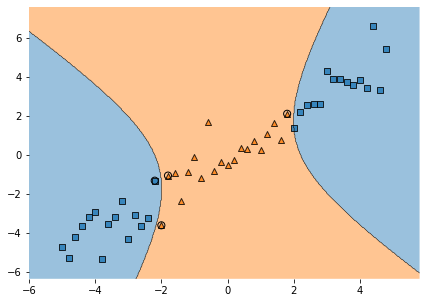

In [45]:
data=df.copy()

X_train,X_test,y_train,y_test = train_test_split(data.drop('y',axis=1),data['y'],test_size = 0.3,random_state = 1)

svc = SVC(kernel = 'poly',degree=2,gamma='auto',C=10) #多项式核 次数为2，总约束为10，
clf = svc.fit(X_train,y_train)
print('Training score is ',svc.score(X_train,y_train))
print('Test score is ',svc.score(X_test,y_test))

plt.figure(figsize = (7,5))
plot_decision_regions(np.array(data.drop('y',axis=1)), np.array(data['y']), clf=svc,legend=0,)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
                   facecolors='none', zorder=10, edgecolors='k')
x_min, x_max = data.iloc[:, 0].min() - .5, data.iloc[:, 0].max() + .5
y_min, y_max = data.iloc[:, 1].min() - .5, data.iloc[:, 1].max() + .5

另一个常用的非线性核函数为高斯径向基核函数，它的表达式为
$$
K\left(x_{i}, x_j\right)=\exp \left(-\gamma (\parallel x_i-x_j \parallel)^{2}\right)
$$
$\gamma$是一个正的常数。

Training score is  1.0
Test score is  0.9333333333333333


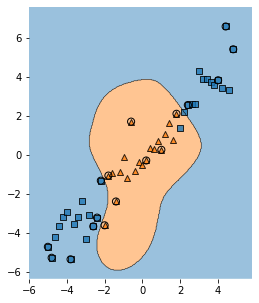

In [46]:
data=df.copy()

X_train,X_test,y_train,y_test = train_test_split(data.drop('y',axis=1),data['y'],test_size = 0.3,random_state = 1)

svc = SVC(kernel = 'rbf',degree=3,gamma='auto',C=5) #高斯径向基，次数为3，总约束为5，
clf = svc.fit(X_train,y_train)
print('Training score is ',svc.score(X_train,y_train))
print('Test score is ',svc.score(X_test,y_test))

plt.figure(figsize = (4,5))
plot_decision_regions(np.array(data.drop('y',axis=1)), np.array(data['y']), clf=svc,legend=0,)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
                   facecolors='none', zorder=10, edgecolors='k')
x_min, x_max = data.iloc[:, 0].min() - .5, data.iloc[:, 0].max() + .5
y_min, y_max = data.iloc[:, 1].min() - .5, data.iloc[:, 1].max() + .5

### 9.3.3 在心脏病数据中的应用

In [44]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,roc_auc_score

import matplotlib.pyplot as plt

第8章用决策树和相关方法对Heart数据进行了分析。分析的目标是使用13个特征，比如Age，Sex和Chol等来预测一个人是否患有心脏病。现在比较SVM和LDA应用到这个数据集上的差异。

In [45]:
data = pd.read_csv('Heart.csv',index_col=0)
print(data.shape)
data.head()

(303, 14)


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [46]:
#去除缺失值 转换文本变量
data.dropna(inplace = True)

data['ChestPain'] = data['ChestPain'].map({'typical':1, 'asymptomatic':2, 'nonanginal':3, 'nontypical':4})
data['Thal'] = data['Thal'].map({'fixed':1, 'normal':2, 'reversable':3})
data['AHD'] = data['AHD'].map({'Yes':1,'No':0})

In [47]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,1,0
2,67,1,2,160,286,0,2,108,1,1.5,2,3.0,2,1
3,67,1,2,120,229,0,2,129,1,2.6,2,2.0,3,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,2,0
5,41,0,4,130,204,0,2,172,0,1.4,1,0.0,2,0


In [48]:
# 划分训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(data.drop('AHD',axis=1),data['AHD'],test_size = 0.3,random_state = 0)
print(X_train.shape,X_test.shape)

(207, 13) (90, 13)


In [49]:
# 用LDA拟合训练样本
lda = LDA()
lda.fit(X_train,y_train)

lda_probs = lda.predict_proba(X_train)[:,1]
fpr_lda, tpr_lda, _ = roc_curve(y_train, lda_probs) #假阳率和真阳率

In [50]:
#  用支持向量分类器（SVC）拟合训练样本
# 支持向量分类器（SVC）等价于使用d=1的多项式核函数的支持向量机。
svc = SVC(kernel='linear',degree = 1,C=10,probability=True) #probability = True表明我们需要模型预测的分类概率，用来计算fpr和tpr
                                                    
svc.fit(X_train,y_train)

svc_probs = svc.predict_proba(X_train)[:,1]
fpr_svc, tpr_svc, _ = roc_curve(y_train, svc_probs)

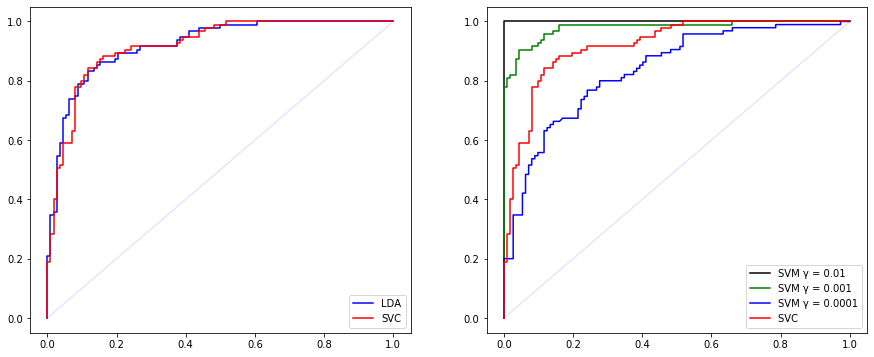

In [51]:
#将LDA和SVC进行对比
fig=plt.figure(figsize = (15,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.plot(fpr_lda,tpr_lda,label="LDA",c = 'b')
ax1.plot(fpr_svc,tpr_svc,label="SVC",c = 'r')
ax1.plot([0,1],[0,1],alpha = 0.1,c = 'b')

ax1.legend(loc=4)


#将支持向量分类器（SVC）与高斯径向基核函数的支持向量机（SVM）进行对比，gamma分别取0.01，0.001，0.0001
fpr_list = []
tpr_list = []
for c in [0.01,0.001,0.0001]:
    svm = SVC(kernel='rbf',probability=True,gamma=c,C=10)
    svm.fit(X_train,y_train)
    

    svm_probs = svm.predict_proba(X_train)[::,1]
    fpr, tpr, _ = roc_curve(y_train, svm_probs)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

ax2.plot(fpr_list[0],tpr_list[0],label = 'SVM γ = 0.01',c = 'black')
ax2.plot(fpr_list[1],tpr_list[1],label = 'SVM γ = 0.001',c = 'green')
ax2.plot(fpr_list[2],tpr_list[2],label = 'SVM γ = 0.0001',c = 'blue')
ax2.plot(fpr_svc,tpr_svc,label="SVC ",c = 'r')

ax2.legend(loc=4)
ax2.plot([0,1],[0,1],alpha = 0.1,c = 'b')

plt.show()

ROC曲线越靠近左上角的分类器性能越好。在这个例子中，SVC和LDA表现差不多好，而在训练集上表现最好的是$\gamma=0.01$的SVM，它的ROC曲线近乎是完美的。表现最差的是$\gamma=0.001$的SVM

这些曲线表现的仅仅是模型在训练集上的分类准确率，而在测试集上情况可能有所不同。

In [14]:
# 用LDA拟合测试集数据
lda = LDA()
lda.fit(X_test,y_test)

lda_probs = lda.predict_proba(X_test)[:,1]
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda_probs)
auc_lda = roc_auc_score(y_test, lda_probs)

In [15]:
# 用SVC拟合测试集数据
svc = SVC(kernel='poly',degree = 1,probability=True) 
svc.fit(X_test,y_test)

svc_probs = svc.predict_proba(X_test)[:,1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_probs)
auc_svc = roc_auc_score(y_test, svc_probs)
import warnings
warnings.filterwarnings("ignore")

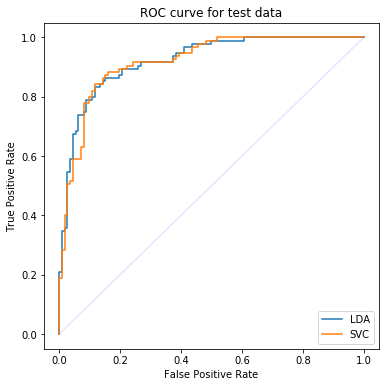

In [53]:
# 将LDA和SVC进行对比
plt.figure(figsize = (6,6))
plt.plot(fpr_lda,tpr_lda,label="LDA")
plt.plot(fpr_svc,tpr_svc,label="SVC")
plt.plot([0,1],[0,1],alpha = 0.1,c = 'b')

plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.show()

在测试集上，支持向量分类器比LDA的分类效果更好一些

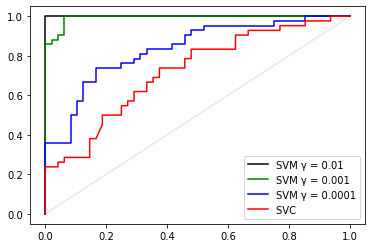

In [21]:
#将支持向量分类器（SVC）与高斯径向基核函数的支持向量机（SVM）进行对比，gamma分别取0.01，0.001，0.0001
fpr_list = []
tpr_list = []
for c in [0.01,0.001,0.0001]:
    svm = SVC(kernel='rbf',probability=True,gamma=c,C=10)
    svm.fit(X_test,y_test)
    

    svm_probs = svm.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test, svm_probs)
    fpr_list.append(fpr)
    tpr_list.append(tpr)


plt.plot(fpr_list[0],tpr_list[0],label = 'SVM γ = 0.01',c = 'black')
plt.plot(fpr_list[1],tpr_list[1],label = 'SVM γ = 0.001',c = 'green')
plt.plot(fpr_list[2],tpr_list[2],label = 'SVM γ = 0.0001',c = 'blue')
plt.plot(fpr_svc,tpr_svc,label="SVC ",c = 'r')

plt.legend(loc=4)
plt.plot([0,1],[0,1],alpha = 0.1,c = 'b')

plt.show()

而在测试集上表现最好的是$\gamma=0.01$的SVM，它的ROC曲线近乎是完美的。但表现最差的是SVC，与训练集上的情况有所不同。

In [54]:
# 用网格搜索（Grid Search）为支持向量机调参
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
"""GridSearchCV:
   Parameters
   ----------
   estimator : estimator object.
   param_grid : dict or list of dictionaries
      Dictionary with parameters names (string) as keys and lists of
      parameter settings to try as values, or a list of such
      dictionaries.
   scoring : string, callable, list/tuple, dict or None, default: None
      A single string (see :ref:`scoring_parameter`) or a callable
      (see :ref:`scoring`) to evaluate the predictions on the test set.
   n_jobs : int or None, optional (default=None)
      Number of jobs to run in parallel.
   cv : int, cross-validation generator or an iterable, optional
      Determines the cross-validation splitting strategy.
       
   Attributes
   ----------     
   best_score_ : float
      Mean cross-validated score of the best_estimator
   best_params_ : dict
      Parameter setting that gave the best results on the hold out data.
"""
param_range_C = [1.0, 10.0, 100.0, 1000.0]
param_range_gamma = [0.0001, 0.001, 0.01, 0.1]
param_grid = [{'C': param_range_C,    ##对高斯径向基核函数支持向量机，对C和gamma调优
               'gamma': param_range_gamma, 
               'kernel': ['rbf']}]
# 一共有64种参数取值组合
gs = GridSearchCV(estimator=SVC(random_state=1), 
                  param_grid=param_grid, 
                  scoring='roc_auc', ##用以评估的标准是roc曲线下面积
                  cv=10,  ##10折交叉验证 也就是说，共做64次网格搜寻，每格里面做一套10折交叉验证
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)  ##输出最优的准确率
print(gs.best_params_)  ##输出达到最优准确率时的参数组合

0.8043434343434344
{'C': 100.0, 'gamma': 0.0001, 'kernel': 'rbf'}


## 9.4 多分类的SVM

SVM的基础，即分割超平面的概念，并不能自然地应用到类别数大于2的情况。尽管把SVM扩展到K类的方法有很多，但是最普遍的两种方法是**一类对一类（one-verses-one）** 的多分类支持向量机方法和**一类对其余（one-verses-all）** 的多分类支持向量机方法。

### 9.4.1 “一类对一类”的分类方法

一类对一类分类方法需要构建$\dbinom{K}{2}$个SVM，每个SVM用来分割两个类别。例如，其中一个SVM可能用来比较第k个类别和第k+1个类别。使用所有$\dbinom{K}{2}$个SVM对样本进行分类，然后记录这个样本被分到每个类别的次数。这个样本的最终预测类别就是预测次数最多的那一类。

### 9.4.1 “一类对其余”的分类方法

一类对其余分类方法是用K个SVM来拟合数据，每个SVM对K个类别中的其中一个类别与其他K-1个类别进行比较。

## 9.5 与逻辑斯谛回归的关系

支持向量分类器的最优化问题
$$
\begin{array}{l}
\underset{\beta_{0}, \beta_{1}, \ldots, \beta_{p}}{\operatorname{maximize}} M \\
\text { subject to } \sum_{j=1}^{p} \beta_{j}^{2}=1, \\
y_{i}\left(\beta_{0}+\beta_{1} x_{i 1}+\beta_{2} x_{i 2}+\ldots+\beta_{p} x_{i p}\right) \geq M \quad {\forall i=1,\ldots,n} 
\end{array} 
$$

可以改写为

$$
\begin{array}{l}
{\operatorname{minimize}} \lambda\sum_{j=1}^{p} \beta_{j}^{2} \\
\text { subject to }
y_{i}\left(\beta_{0}+\beta_{1} x_{i 1}+\beta_{2} x_{i 2}+\ldots+\beta_{p} x_{i p}\right) \geq 1 \quad {\forall i=1,\ldots,n} 
\end{array} 
$$

从而最优化问题可表示为
$$
\begin{equation} 
\operatorname{minimize}_{\beta_{0}, \beta_{1}, \ldots, \beta_{p}}\left\{\sum_{i=1}^{n} \max \left[0,1-y_{i} f\left(x_{i}\right)\right]+\lambda \sum_{j=1}^{p} \beta_{j}^{2}\right\} \qquad            
\end{equation}
$$

上式采用的是“损失函数+惩罚项”的形式。注意到$\lambda\sum_{j=1}^{p} \beta_{j}^{2}$也是岭回归的惩罚项，相似地，这一项在支持向量分类器中也起到控制偏差与方差的trade-off的作用。其中$\lambda$为非负的调节参数。$\lambda$较大时，能够容忍穿过间隔的样本就越多，我们会得到一个方差较小但偏差较大的分类器。$\lambda$较小时则反之。因此较大的$\lambda$值就等价于较大的调节参数C。

在构建支持向量分类器时，只有支持向量发挥实际作用，落在间隔以外被正确分类的观测点并不影响分类器。这与损失函数所反映的情况一致：对于$y_{i}*(\beta_{0}+ \beta_{1} X_{i1}+\ldots+\beta_{ip}X_{ip})\geq 1$的样本，也就是落在间隔以外得到正确分类的样本，损失函数$\sum_{i=1}^{n} \max \left[0,1-y_{i}(\beta_{0}+\beta_{1} x_{i 1}+\beta_{2} x_{i 2}+\ldots+\beta_{p} x_{i p}) \right]$正好为0.

损失函数$\sum_{i=1}^{n} \max \left[0,1-y_{i}(\beta_{0}+\beta_{1} x_{i 1}+\beta_{2} x_{i 2}+\ldots+\beta_{p} x_{i p}) \right]$被称为铰链损失（hinge loss），和在逻辑斯谛回归中使用的损失函数非常接近。

将支持向量分类器与逻辑斯谛回归的损失函数进行比较，后者的损失函数在任何时候都不为零。但这两个损失函数非常相似，通常来说，逻辑斯谛回归和支持向量分类器得到的结果也非常相近。当不同类别的观测可以很好地被分离时，SVM的表现更好，但是如果不同类别存在较多重叠，选择逻辑斯谛回归比较合适。

![title='fig12'](fig/6.png)